In [1]:
import healpy as hp
import numpy  as np
from scipy.stats import zscore

%matplotlib inline

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RIN

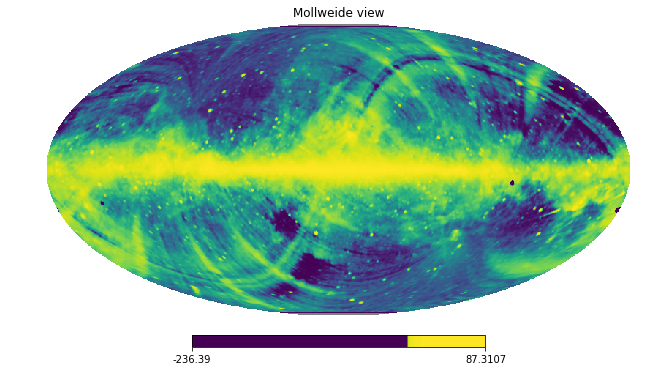

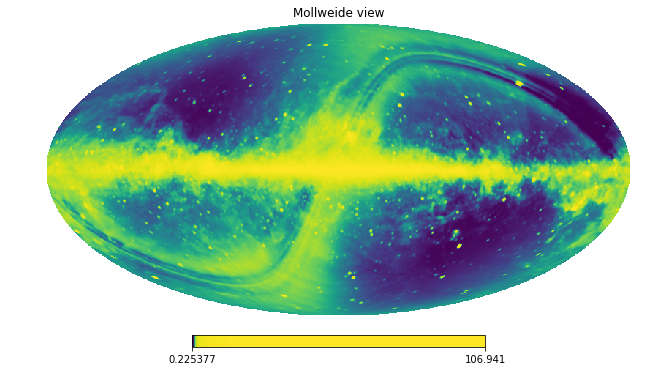

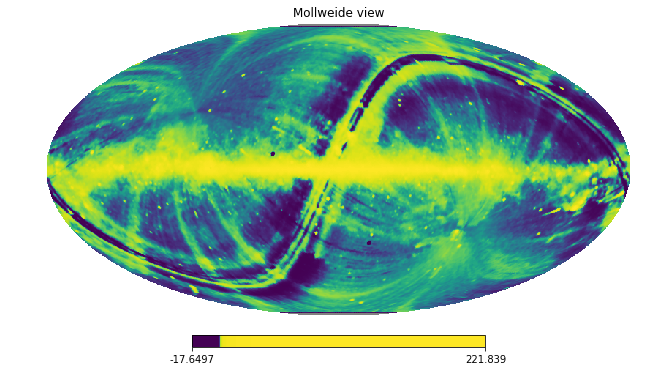

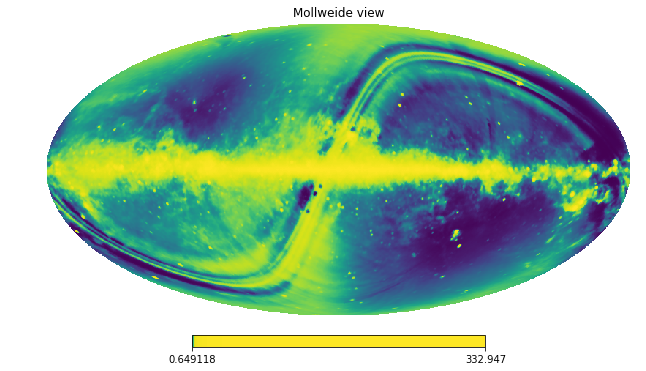

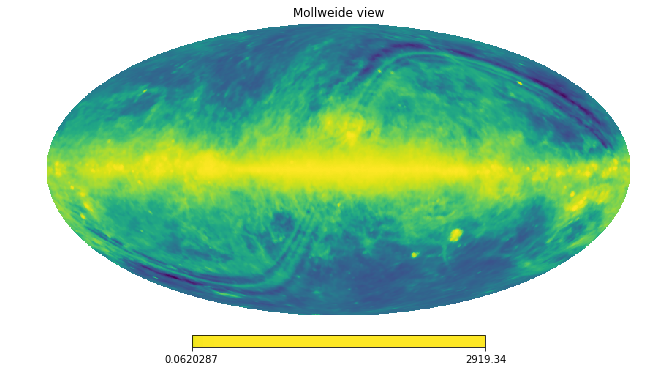

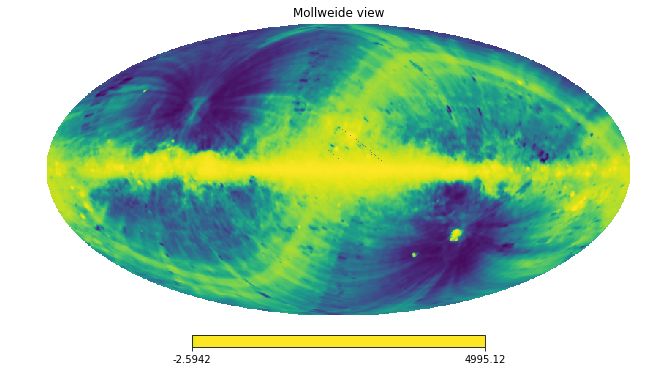

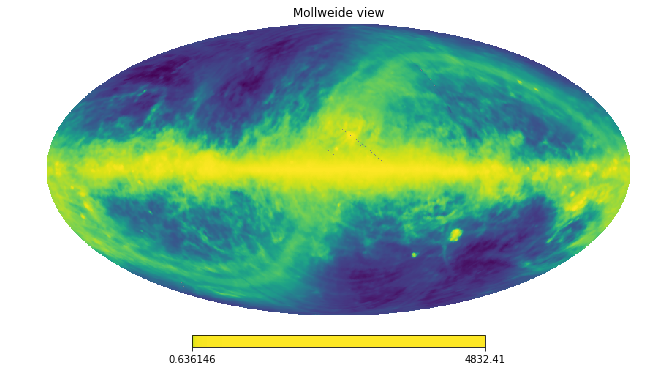

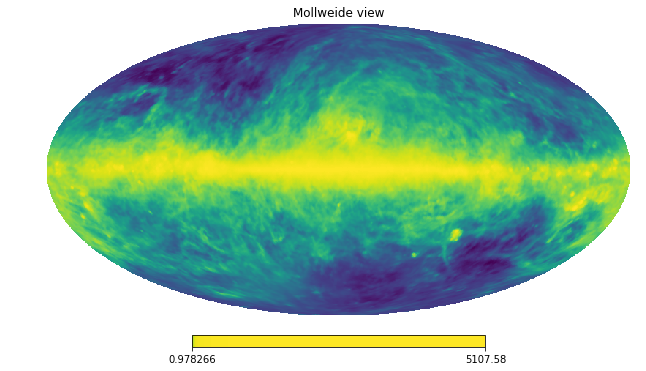

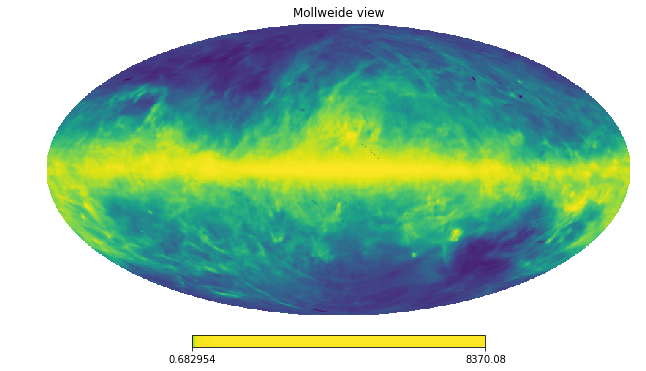

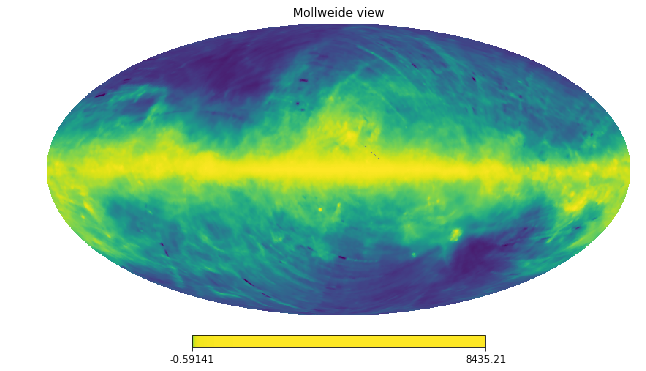

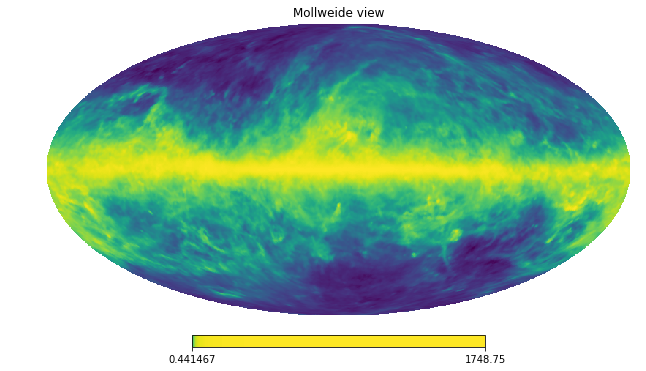

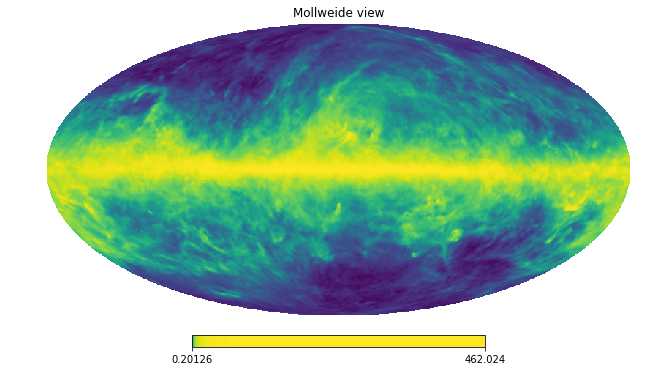

In [129]:
bands = ['akari_9',
         'iras_12',
         'akari_18',
         'iras_25',
         'iras_60',
         'akari_65','akari_90','iras_100','akari_140','akari_160','planck_857','planck_545']
def smoothIt(band, res_deg = 1):
     map = hp.read_map("../{}_256.fits.gz".format(band))
     map = hp.smoothing(map, fwhm = res_deg*(np.pi/180))
     hp.mollview(map, norm='hist')
     hp.write_map("../{}_256_1dres.fits.gz".format(band), map, overwrite=True )
    
for band in bands:
    smoothIt(band)

# Extract the HFI 857 GHz and LFI 30 GHz mask columns from the giant HEALPix files
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/LFI_Mask_PointSrc_2048_R2.00/index.html
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_PointSrc_2048_R2.00/index.html

In [130]:
hfi857_mask = hp.read_map('HFI_Mask_PointSrc_2048_R2.00.fits',
                           hdu = 1,
                           field = 5,
                           nest = True)


NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


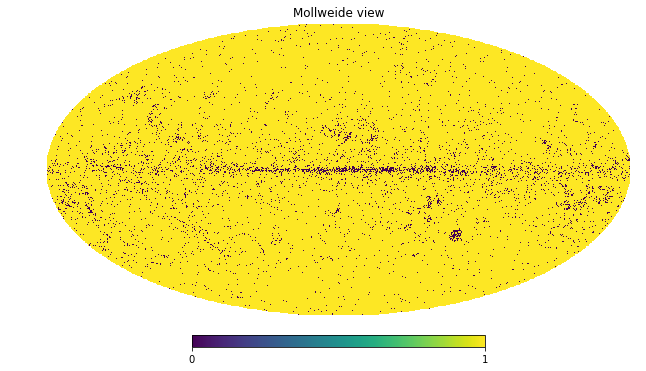

In [131]:
hp.mollview(hfi857_mask, nest=True)

In [132]:
hfi857_mask[hfi857_mask == 0] = hp.UNSEEN

In [133]:
hfi857_mask = hp.ud_grade(hfi857_mask, nside_out = 256, order_in = 'NESTED', order_out = 'NESTED', pess= True )

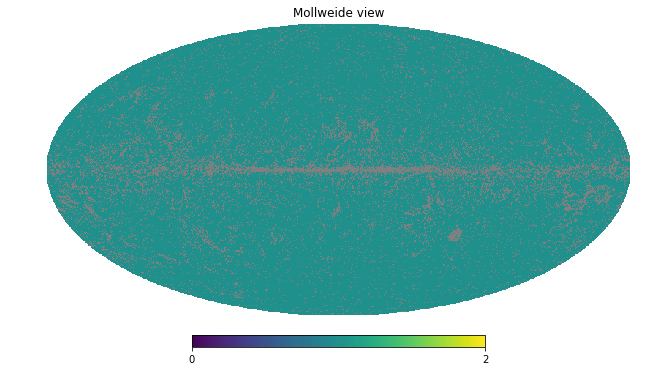

In [134]:
hp.mollview(hfi857_mask, nest=True)

In [135]:
hp.write_map('HFI_857_Mask_PointSrc_256_R2.00.fits', hfi857_mask,  nest=True, overwrite=True)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


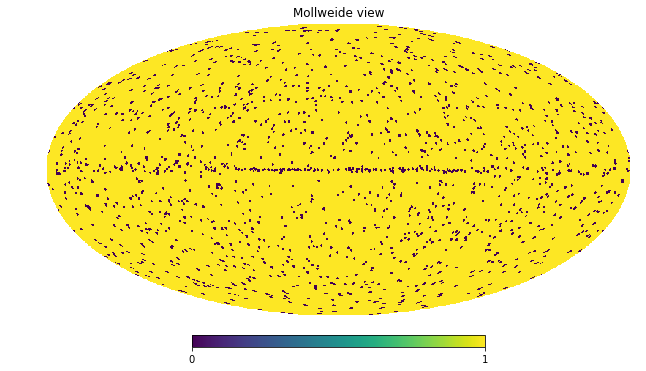

In [136]:
lfi30_mask = hp.read_map('LFI_Mask_PointSrc_2048_R2.00.fits',
                           hdu = 1,
                           field = 0,
                           nest = True)
hp.mollview(lfi30_mask, nest=True)

In [137]:
lfi30_mask[lfi30_mask == 0] = hp.UNSEEN

In [138]:
lfi30_mask = hp.ud_grade(lfi30_mask, nside_out = 256, order_in = 'NESTED', order_out = 'NESTED', pess= True )

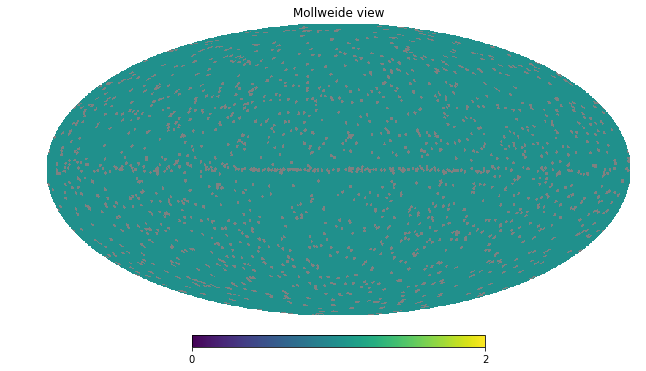

In [139]:
hp.mollview(lfi30_mask, nest=True)

In [140]:
hp.write_map('LFI_30_Mask_PointSrc_256_R2.00.fits', lfi30_mask,  nest=True, overwrite=True)

In [141]:
planck_mask = lfi30_mask.copy()

In [142]:
planck_mask[hfi857_mask==hp.UNSEEN] = hp.UNSEEN

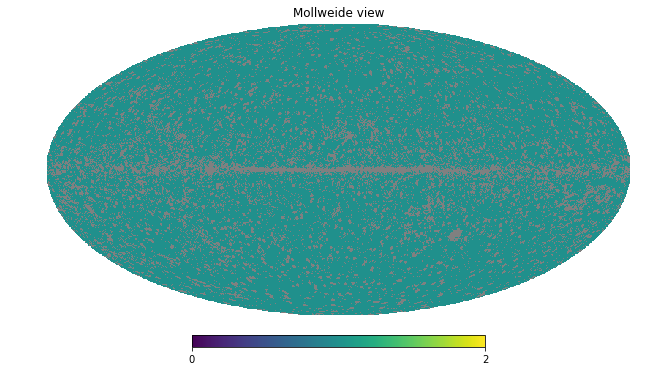

In [143]:
hp.mollview(planck_mask,nest=True)

In [144]:
hp.write_map('Planck_allband_Mask_PointSrc_256_R2.00.fits', planck_mask,  nest=True, overwrite=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


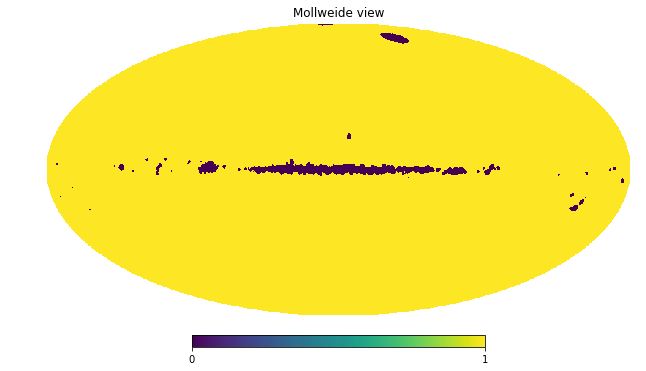

In [145]:
com_gal_mask = hp.read_map('COM_Mask_CMB-PointSrcGalplane-commander-dx11d2-temp-lmax200_0256_R2.03.fits', nest=True)
hp.mollview(com_gal_mask, nest = True)

In [146]:
ecl_lat = hp.read_map('../pixel_coords_map_ring_ecliptic_res8.fits', field = 1, nest=True)
gal_lat = hp.read_map('../pixel_coords_map_ring_galactic_res8.fits', field = 1, nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


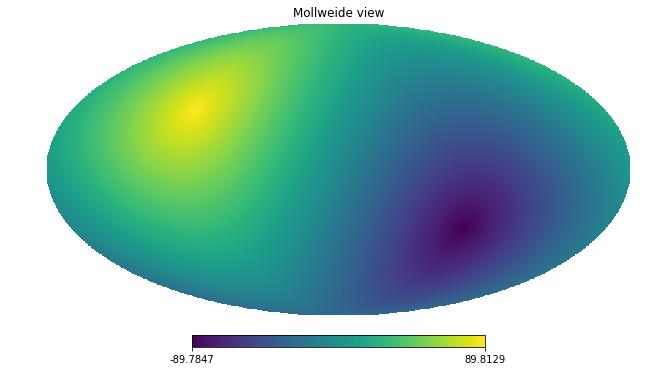

In [147]:
hp.mollview(ecl_lat, nest=True)

In [148]:
mask_ecl = planck_mask.copy()

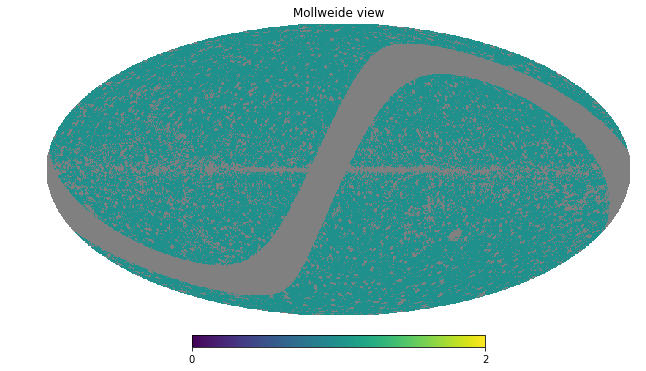

In [149]:
mask_ecl[abs(ecl_lat) < 10] = hp.UNSEEN
hp.mollview(mask_ecl, nest=True)

In [150]:
#mask_gal = planck_mask.copy()
#mask_gal[abs(gal_lat)>30] = hp.UNSEEN
#hp.mollview(mask_gal, nest=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST


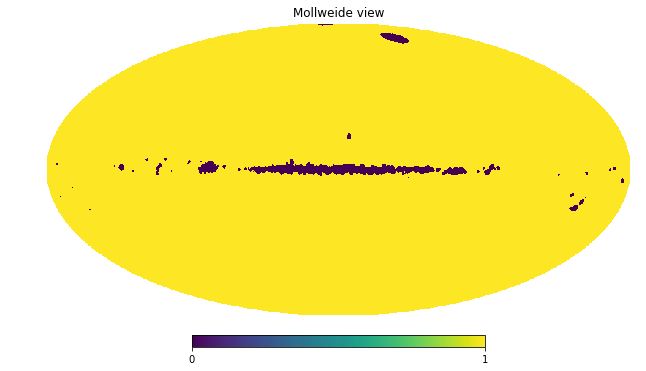

In [151]:
com_galmask = hp.read_map('COM_Mask_CMB-PointSrcGalplane-commander-dx11d2-temp-lmax200_0256_R2.03.fits', nest =True)
hp.mollview(com_galmask, nest=True)

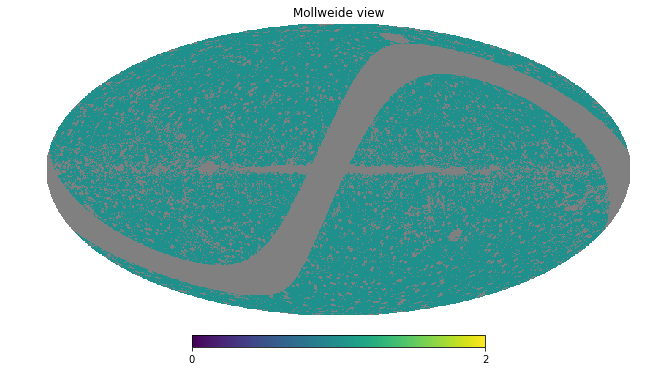

In [166]:
mask_all = mask_ecl.copy()
mask_all[com_galmask==0] = hp.UNSEEN
hp.mollview(mask_all, nest =True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 2.26173
akari_9 std = 0.100382888541


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


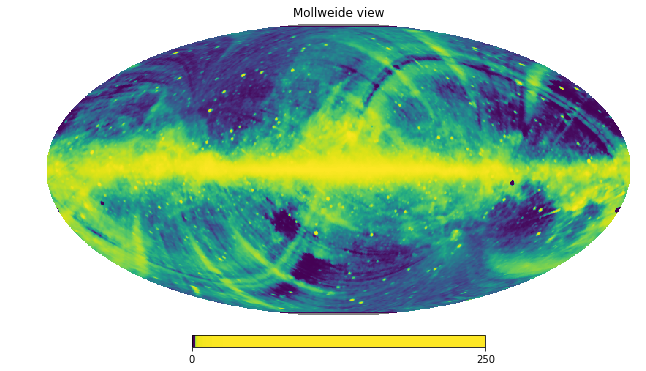

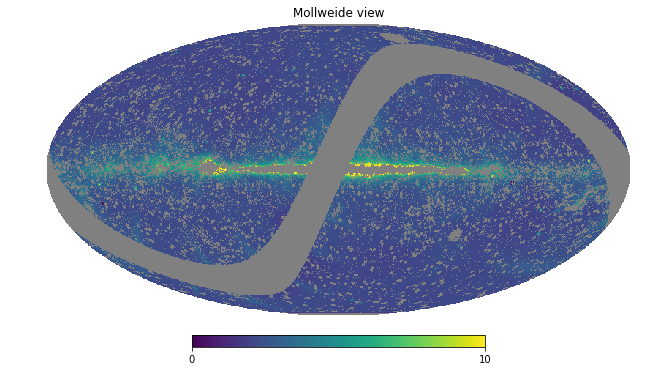

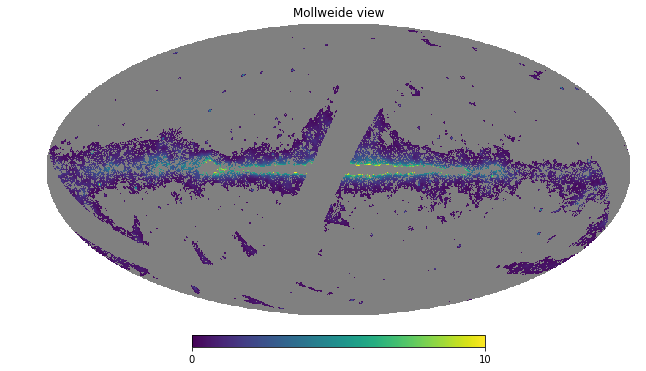

In [167]:
def sigmaMask(band, maskmap, I_cutoff=0.02):
    

    irmap =  hp.read_map('../{}_256_1dres.fits.gz'.format(band), nest=True)
    hp.mollview(irmap, nest=True, min=0, max = 250, norm = 'hist')

    irmap[maskmap==hp.UNSEEN]=hp.UNSEEN
    hp.mollview(irmap, nest=True, min = 0, max = 10)

    irmap = hp.remove_monopole(
        irmap, gal_cut=15,nest=True)

    irmap[irmap == hp.UNSEEN] = np.nan

    irmap_std = np.nanstd(irmap[irmap<I_cutoff])
    
    print band+" "+"std = "+str(irmap_std)
    
    irmap[irmap<3*irmap_std]=np.nan
    irmap[irmap>100*irmap_std]=np.nan
    
    hp.mollview(irmap, nest=True, min=0, max=10)
    
    return irmap

akari9_masked = sigmaMask('akari_9', mask_all)
akari9_masked[np.isnan(akari9_masked)]=hp.UNSEEN
mask_all[akari9_masked==hp.UNSEEN] = hp.UNSEEN
hp.write_map('mask_all.fits', mask_all, nest=True, overwrite=True)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 0.955794
iras_12 std = 0.0984413439556


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


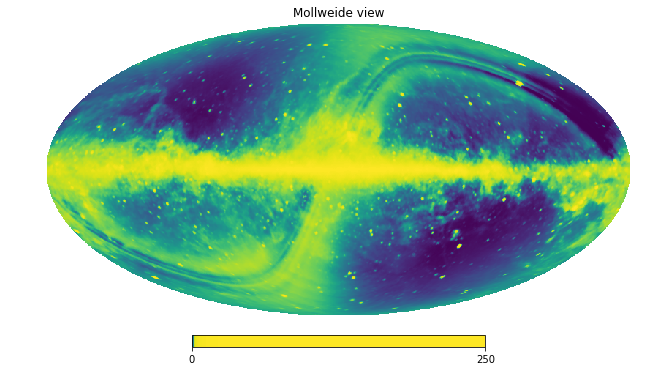

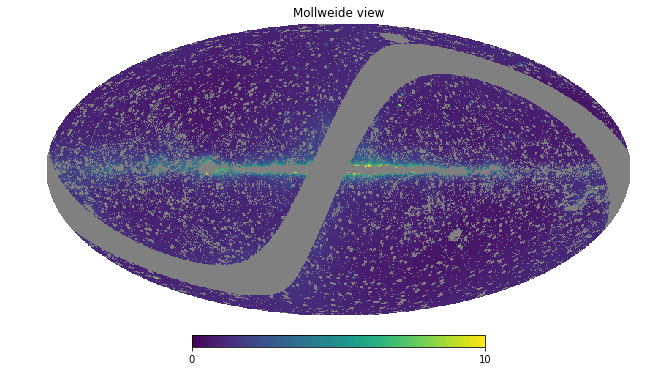

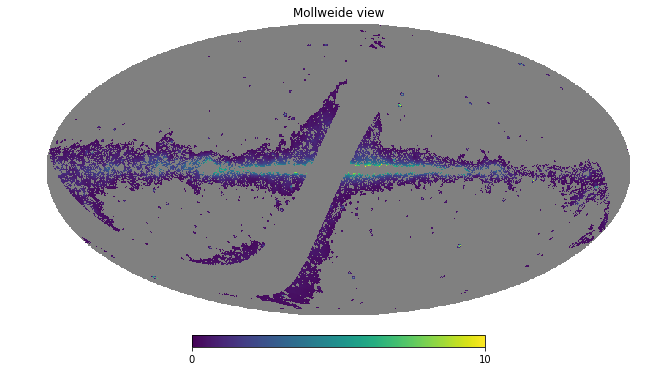

In [154]:
iras12_masked = sigmaMask('iras_12', mask_all)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 5.09173
akari_18 std = 0.258690631696


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


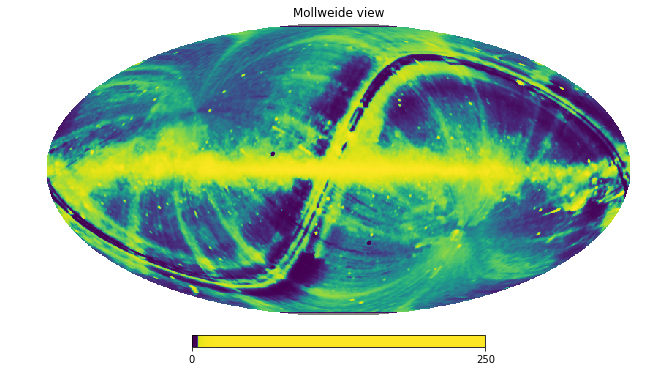

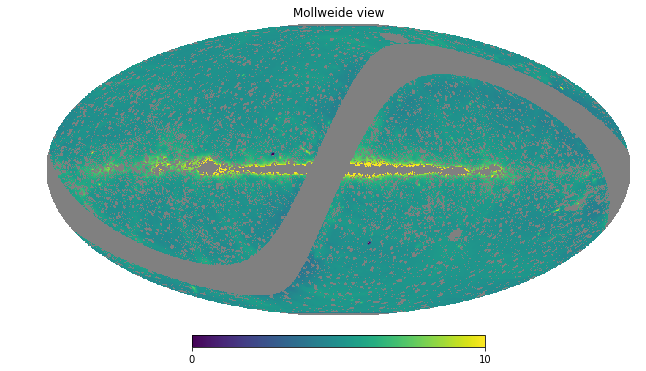

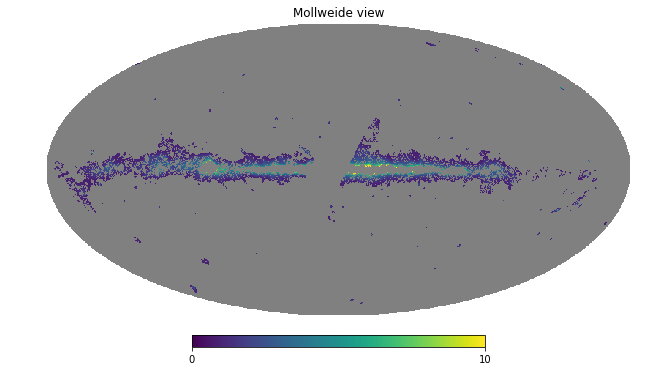

In [155]:
akari18_masked = sigmaMask('akari_18', mask_all, I_cutoff = 0.001)

NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ordering converted to NEST
monopole: 1.73971
iras_25 std = 0.134317371546


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


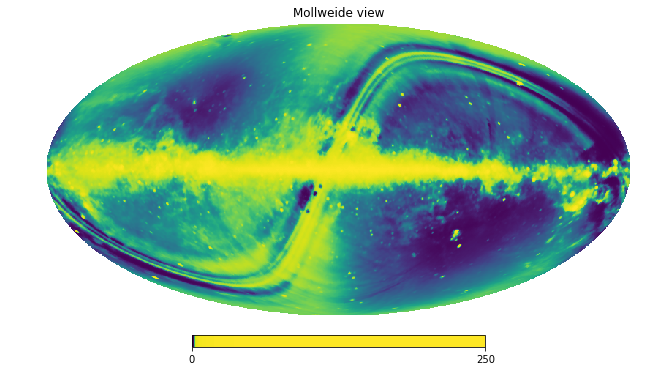

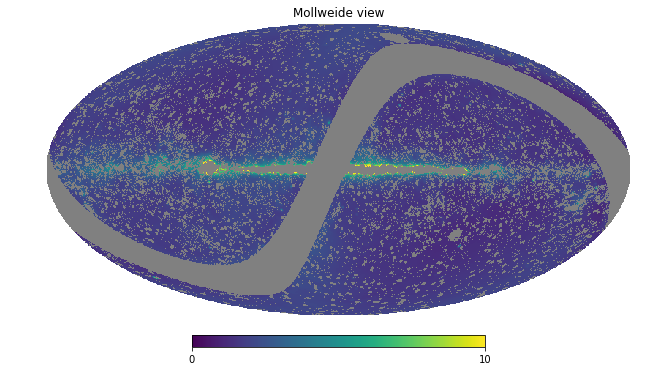

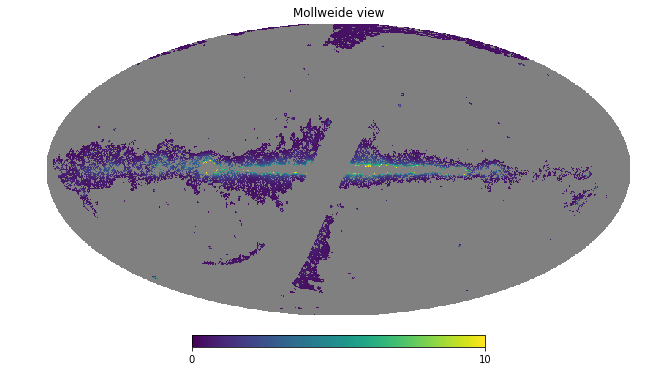

In [156]:
iras25_masked = sigmaMask('iras_25', mask_all)

In [157]:
np.sqrt(np.nanmean((iras12[iras12<0.0001])**2))

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


nan

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


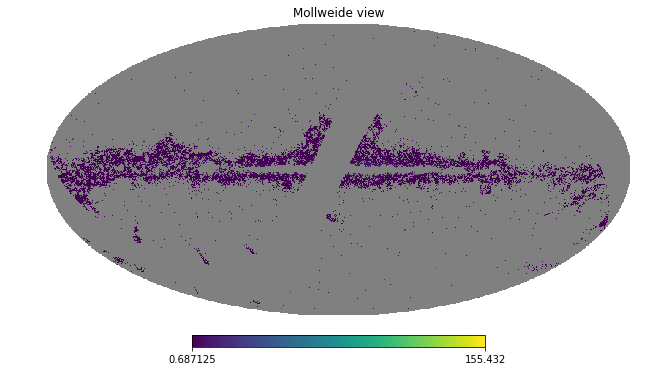

In [158]:
akari9_masked[akari9_masked<3*a9_std]=hp.UNSEEN
hp.mollview(akari9, nest=True)

In [159]:
np.nanmean(akari9)

-1.4566121035098736e+30

In [160]:
mask_all[akari9==hp.UNSEEN] = hp.UNSEEN

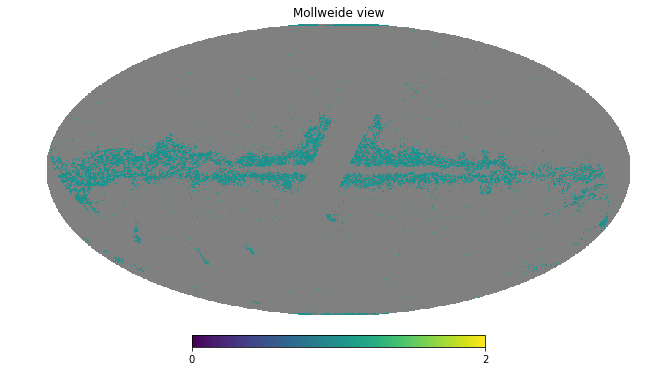

In [161]:
hp.mollview(mask_all, nest=True)

In [162]:
#mask_all[mask_gal==hp.UNSEEN] = hp.UNSEEN

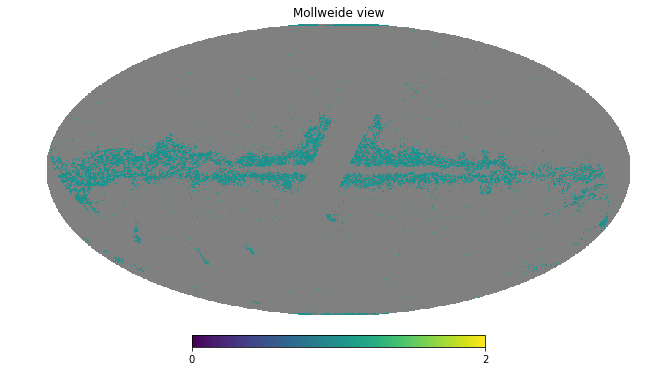

In [163]:
hp.mollview(mask_all, nest=True)

In [164]:
mask_all[akari9==hp.UNSEEN] = hp.UNSEEN
hp.write_map('mask_all.fits', mask_all, nest=True, overwrite=True)